## **Employee Performance Analysis**

## **Problem Statement**

INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider¶

with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management.CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance



## **The following insights are expected from this project.**

➤ Department wise performances

➤ Top 3 Important Factors effecting employee performance

➤ A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

➤ Recommendations to improve the employee performance based on insights from analysis.

## **Data Understanding**

The data for training the model was collected from the company INX Future Inc. The data collected included 1200 employee’s performance appraisal records, described by 28 parameters. the parameters show the different attributes of an employee based on which the prediction is to be made.

## **Features present in the dataset**

1-EmpNumber

2-Age

3-Gender

4-EducationBackground

5-MaritalStatus

6-EmpDepartment

7-EmpJobRole

8-BusinessTravelFrequency

9-DistanceFromHome

10-EmpEducationLevel

11-EmpEnvironmentSatisfaction

12-EmpHourlyRate

13-EmpJobInvolvement

14-EmpJobLevel

15-EmpJobSatisfaction

16-NumCompaniesWorked

17-OverTime

18-EmpLastSalaryHikePercent

19-EmpRelationshipSatisfaction

20-TotalWorkExperienceInYears

21-TrainingTimesLastYear

22-EmpWorkLifeBalance

23-ExperienceYearsAtThisCompany

24-ExperienceYearsInCurrentRole

25-YearsSinceLastPromotion

26-YearsWithCurrManager

27-Attrition

28-PerformanceRating

## Importing Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing Dataset

In [ ]:
raw_data=pd.read_excel('/content/drive/MyDrive/data/Employee Performance Analysis/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')


In [ ]:
data=raw_data.copy()

## Basic checks

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [ ]:
data.shape

(1200, 28)

#### ***Insights***
We have 1200 Rows and 28 Columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [ ]:
data.dtypes[data.dtypes=='object']

,0
EmpNumber,object
Gender,object
EducationBackground,object
MaritalStatus,object
EmpDepartment,object
EmpJobRole,object
BusinessTravelFrequency,object
OverTime,object
Attrition,object


### Unique Values of each column

In [ ]:
object_cols = data.select_dtypes(include='object')

for col in object_cols.columns:
    print(f"\nColumn: {col}")
    print(data[col].unique())


Column: EmpNumber
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']

Column: Gender
['Male' 'Female']

Column: EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']

Column: MaritalStatus
['Single' 'Married' 'Divorced']

Column: EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']

Column: EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']

Column: BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: OverTime
['No' 'Yes']

Column: Attrition
['No' 'Yes']


In [ ]:
data.PerformanceRating.unique()

array([3, 4, 2])

In [ ]:
null=data.isnull().sum()
null[null>1]

,0


#### ***Insights***
There is no null values


In [ ]:
duplicates = data[data.duplicated()]
duplicates

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### ***Insights***
There is no duplicated values


## Statistical Analysis

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [ ]:
data.describe(include='object')

## ***Insights***

➤ Most employees are mid-career professionals (~37
   years old) with about 11 years of experience and 7 years at the current company.

➤ Performance ratings are concentrated around 3,
   so there's limited variance and class imbalance.

➤ Satisfaction and involvement metrics (job,
   environment, relationship) average around 2.7–2.8,so there's moderate engagement overall.

## Exploratory Data Analysis

### *Distribution of PerformanceRating(Target Variable)*

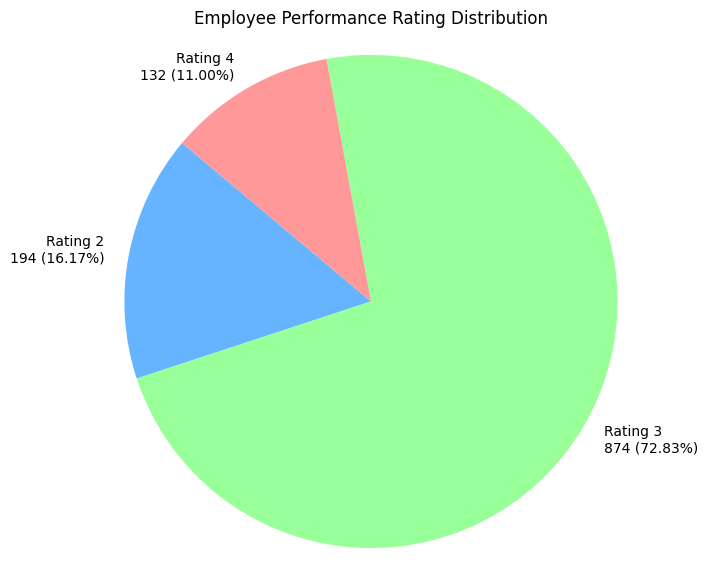

In [ ]:
rating_counts = data['PerformanceRating'].value_counts().sort_index()
rating_percent = rating_counts / rating_counts.sum() * 100

labels = [f'Rating {rating}\n{count} ({percent:.2f}%)'
          for rating, count, percent in zip(rating_counts.index, rating_counts, rating_percent)]

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(rating_counts, labels=labels, startangle=140, colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.title('Employee Performance Rating Distribution')
plt.axis('equal')
plt.show()


#### ***Insights***
➤ More Employees have the performance of Rating 3, almost 72 percent.

➤ we could notice class imbalance here we could deal it later.

### *Count of Employees by Performance Rating per Department*

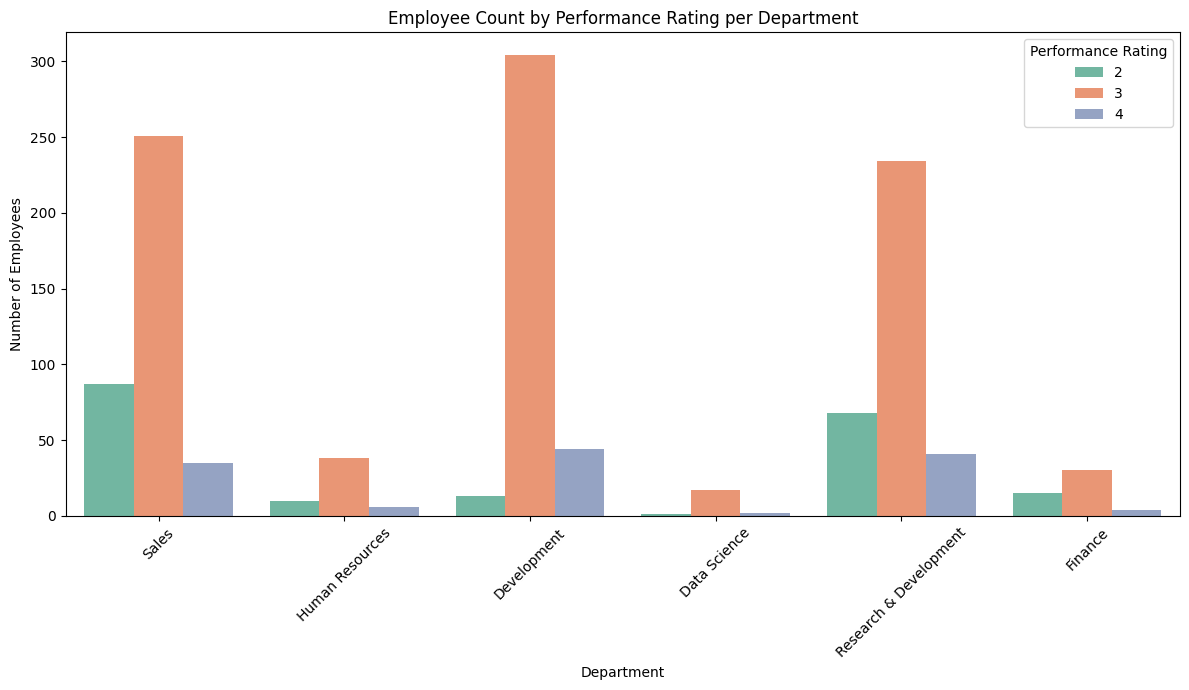

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='EmpDepartment', hue='PerformanceRating', palette='Set2')
plt.title('Employee Count by Performance Rating per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


## ***Insights***

➤ Development department has the largest workforce, with the highest count of top performers (rating 4) and a majority rated 3.


➤ Sales also has a large number of employees, but it shows a significant number of low performers (rating 2) compared to other departments.


➤ Research & Development has a strong concentration of employees rated 3, with a decent number rated 4, indicating consistently solid performance.


➤ Human Resources and Finance have smaller teams, mostly rated 3, but with fewer top-rated employees.


➤ Data Science is the smallest department, with most employees rated 3 and very few rated 2 or 4, suggesting average but stable performance.

### *Average Performance Rating by Department*

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64


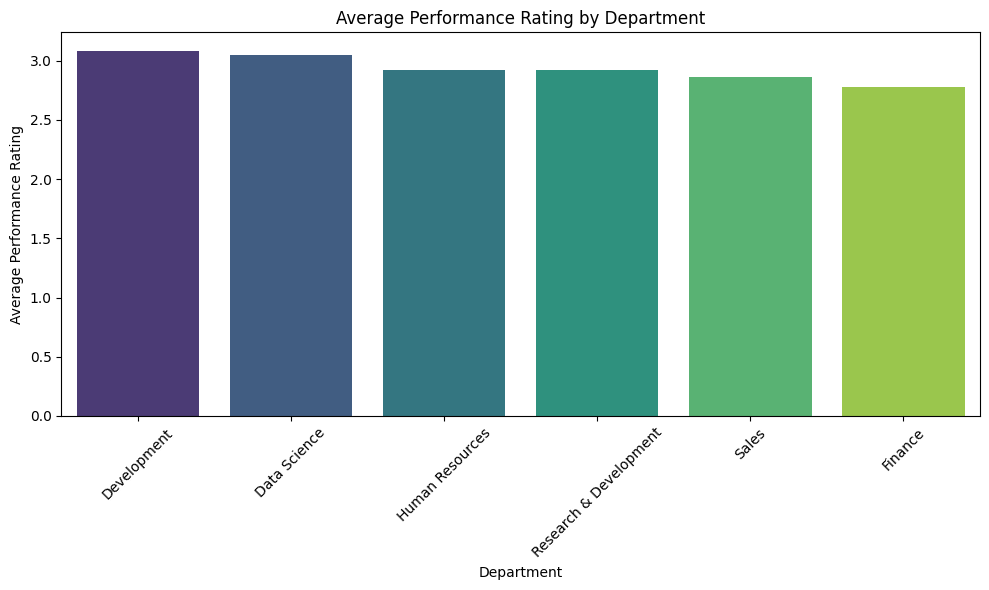

In [ ]:
dept_perf = data.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
print(dept_perf)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=dept_perf.index, y=dept_perf.values, palette='viridis')
plt.title('Average Performance Rating by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ***Insights***

➤ Development and Data Science departments have the
   highest average performance ratings, indicating stronger overall performance in these areas.


➤ Finance has the lowest average performance rating,
   which may suggest the need for further training, resources, or performance management review in that department.

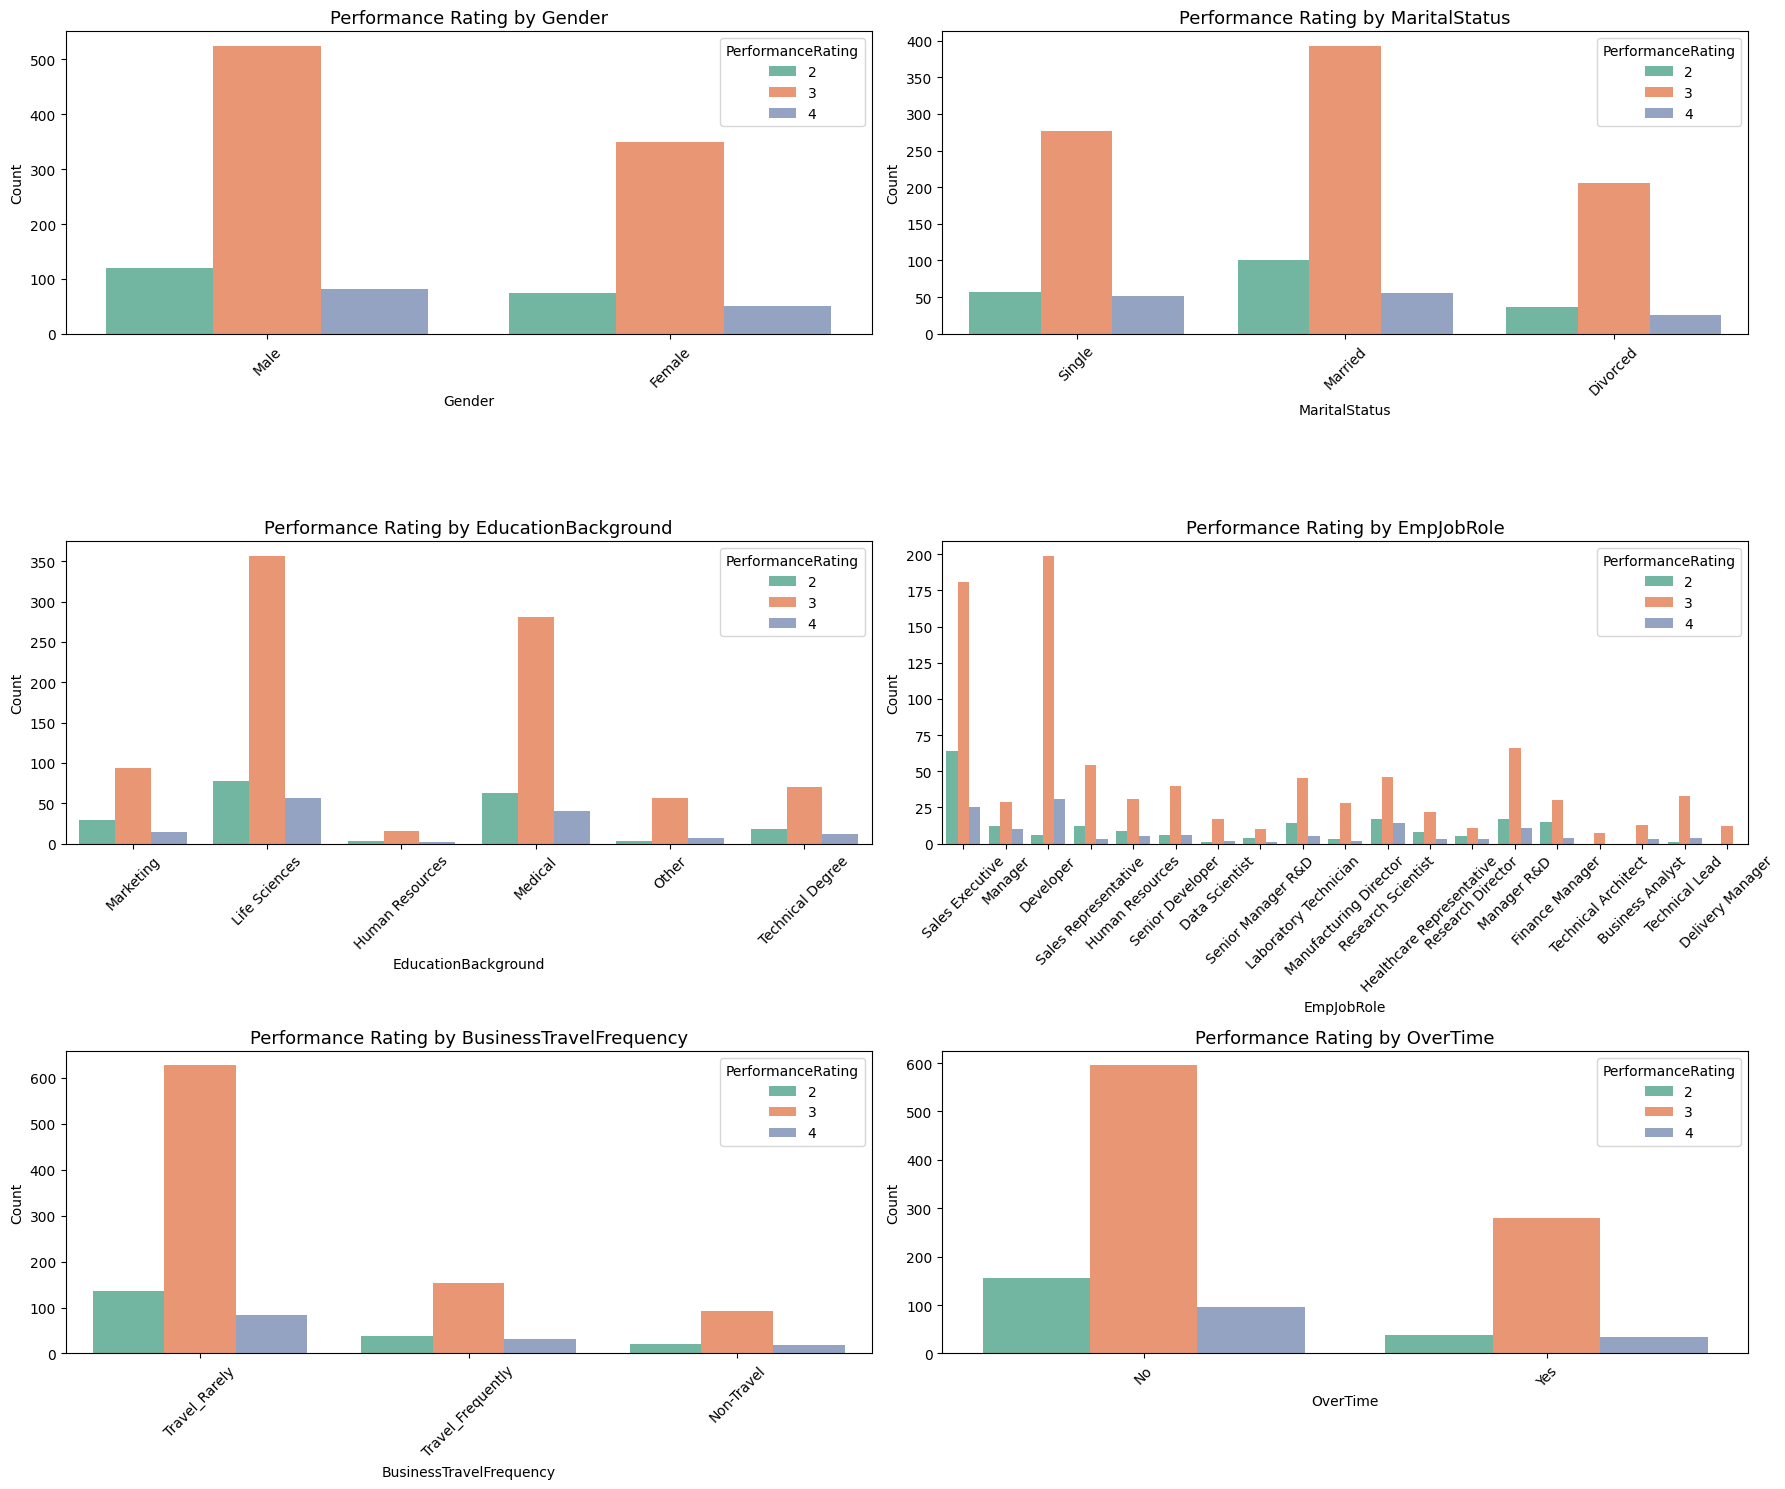

In [ ]:
# Define categorical features
categorical_features = ['Gender', 'MaritalStatus', 'EducationBackground',
                        'EmpJobRole', 'BusinessTravelFrequency', 'OverTime']

n_cols = 2
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 5))

for idx, col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=data, x=col, hue='PerformanceRating', palette='Set2')
    plt.title(f'Performance Rating by {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='PerformanceRating')

plt.tight_layout()
plt.show()


## ***Insights***

➤ Performance Rating 3 is the most common across all
   gender, marital status, and education groups.


➤ Employees who travel rarely and those not working overtime predominantly receive a rating of 3.


➤ Life Sciences and Medical education backgrounds show a notable number of top performers (Rating 4).


➤ Roles like 'Sales Executive' and 'Research Scientist' have a relatively higher share of high-rated employees.

In [ ]:
categorical_features = ['Gender', 'MaritalStatus', 'EducationBackground',
                        'EmpJobRole', 'BusinessTravelFrequency', 'OverTime']

for col in categorical_features:
    print(f"\n--- {col} ---")
    counts = data[col].value_counts()
    percentages = data[col].value_counts(normalize=True) * 100
    summary = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    print(summary)



--- Gender ---
        Count  Percentage
Gender                   
Male      725   60.416667
Female    475   39.583333

--- MaritalStatus ---
               Count  Percentage
MaritalStatus                   
Married          548   45.666667
Single           384   32.000000
Divorced         268   22.333333

--- EducationBackground ---
                     Count  Percentage
EducationBackground                   
Life Sciences          492   41.000000
Medical                384   32.000000
Marketing              137   11.416667
Technical Degree       100    8.333333
Other                   66    5.500000
Human Resources         21    1.750000

--- EmpJobRole ---
                           Count  Percentage
EmpJobRole                                  
Sales Executive              270   22.500000
Developer                    236   19.666667
Manager R&D                   94    7.833333
Research Scientist            77    6.416667
Sales Representative          69    5.750000
Laboratory Techn

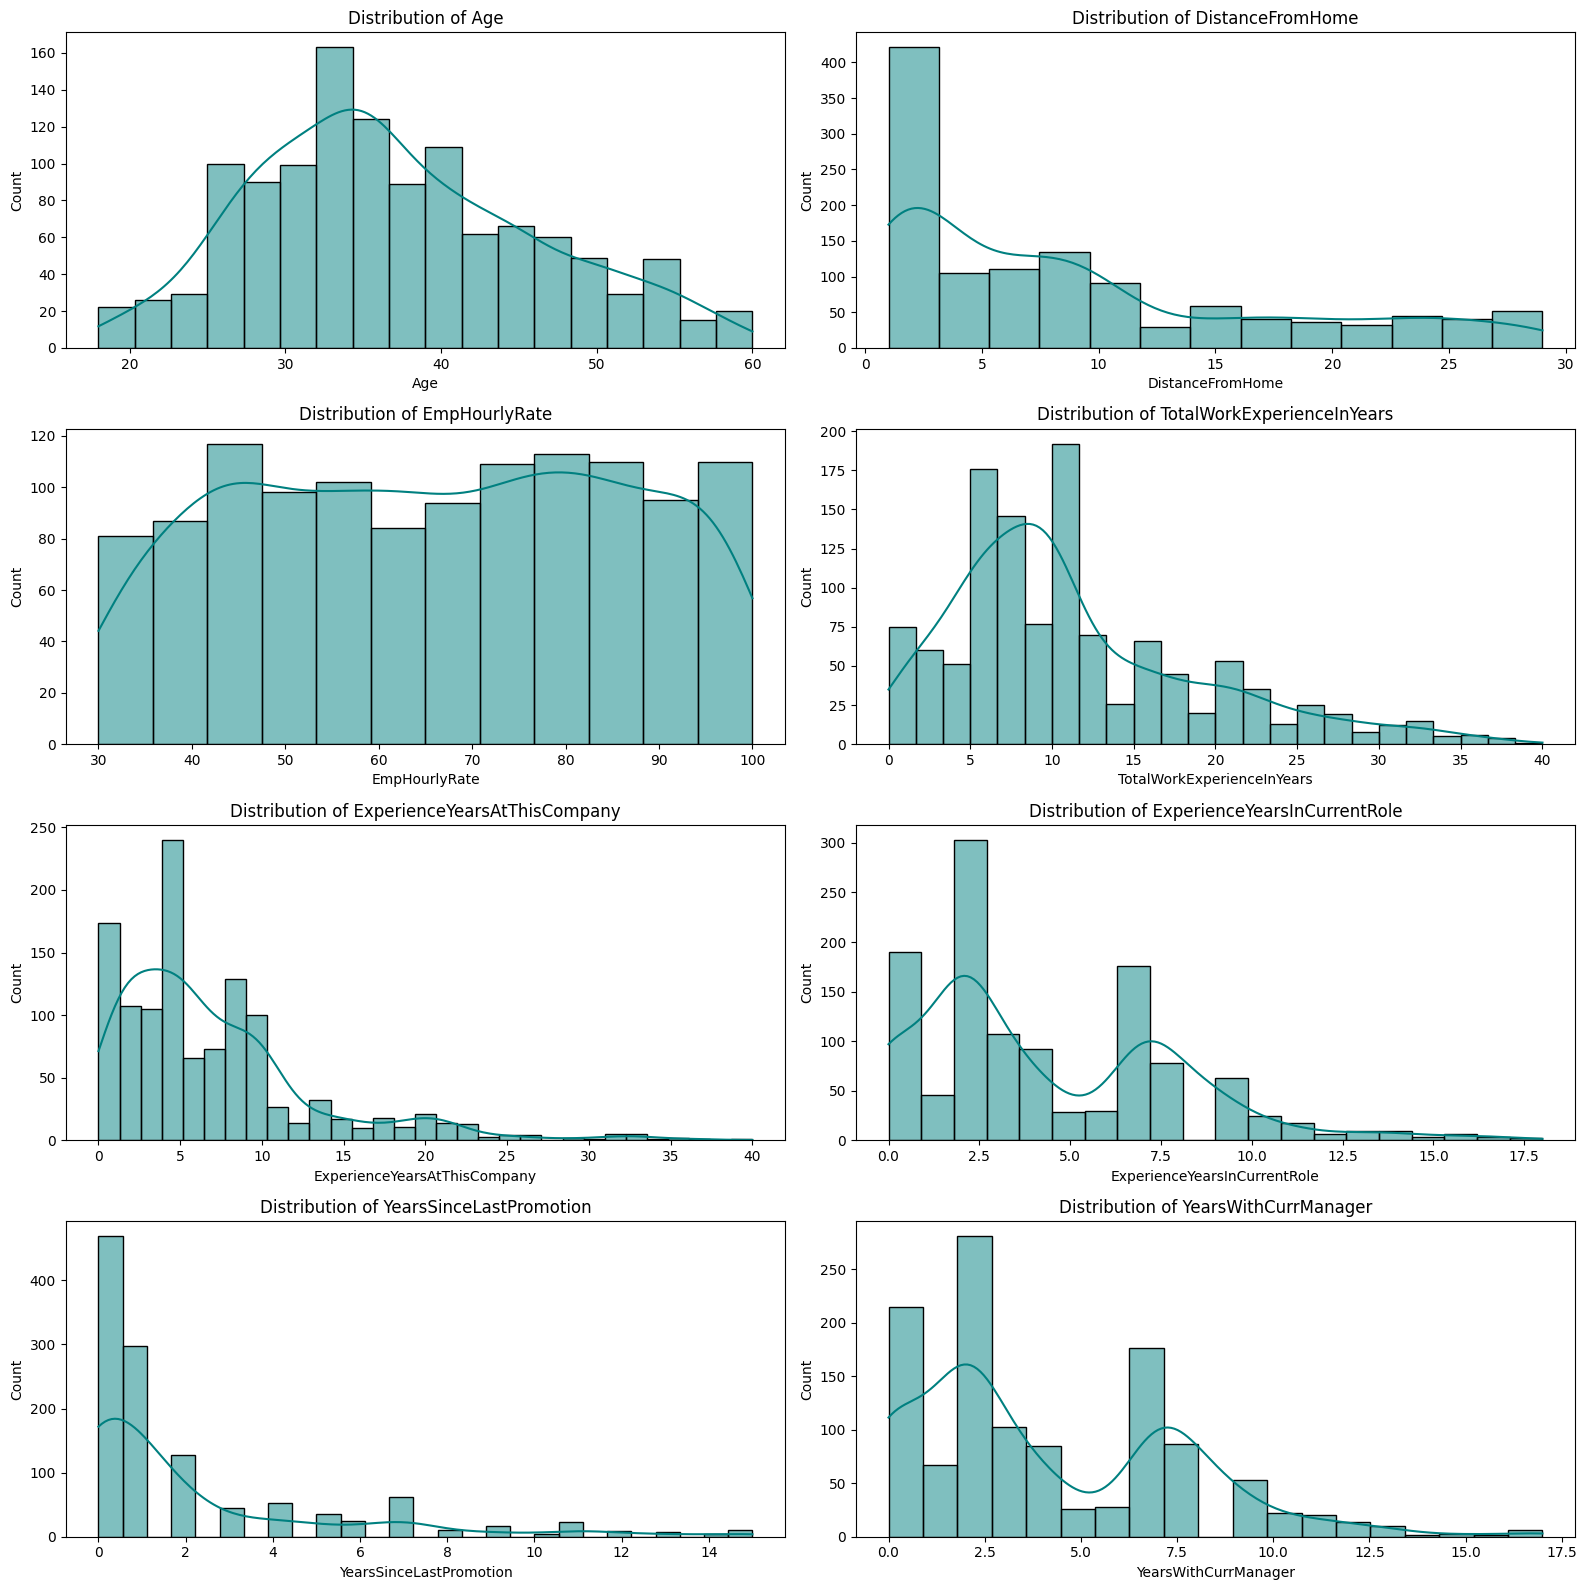

In [ ]:
numerical_features = [
    'Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
n_cols = 2
n_rows = (len(numerical_features) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for idx, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## ***Insights***

➤ Most employees are aged between 30 and 40, indicating a  young workforce.


➤ A large portion of employees live close to the workplace, with distances from home heavily skewed toward the lower end.


➤ The majority have less than 10 years of total work experience, and many are relatively new to their current company or role.


➤ Very few employees have been promoted recently or have long tenures with their current manager, suggesting limited internal mobility.

### *Effect of Overtime on Performance Rating*

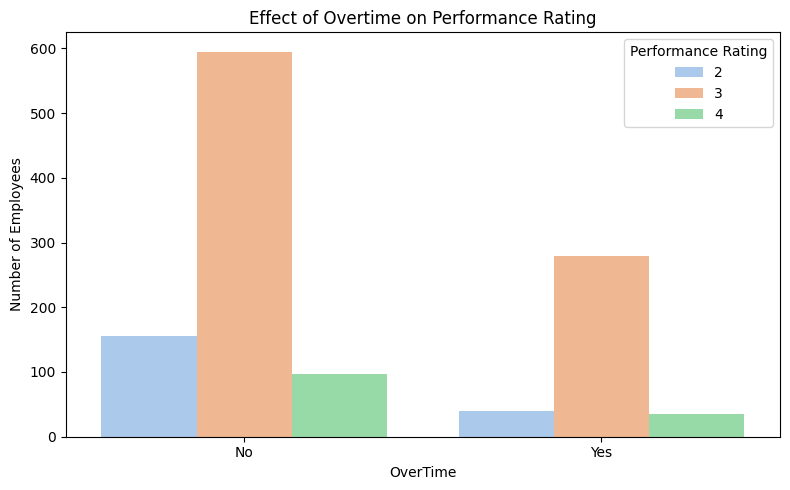

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='OverTime', hue='PerformanceRating', palette='pastel')
plt.title('Effect of Overtime on Performance Rating')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


## ***Insights***

➤ Employees who do not work overtime tend to have higher overall performance ratings, especially at Rating 3 and 4 levels.


➤ Those who work overtime are fewer in number and show a lower distribution across all performance ratings

### *Effect of Travel Frequency on Performance Rating*

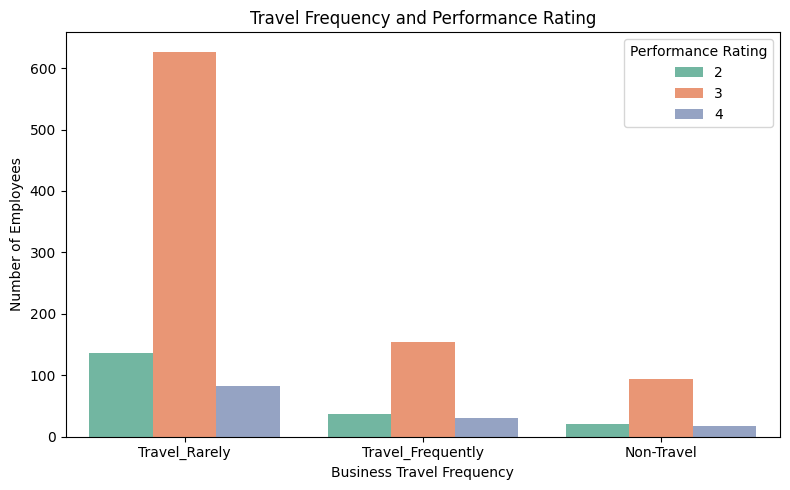

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='BusinessTravelFrequency', hue='PerformanceRating', palette='Set2')
plt.title('Travel Frequency and Performance Rating')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


## ***Insights***

➤ Employees who travel rarely exhibit the highest performance ratings overall, especially in the mid-range (Rating 3), suggesting stability in moderate travel schedules.


➤ Those who travel frequently or do not travel at all have noticeably lower counts across all performance ratings, indicating that either extreme may be less conducive to high performance.

### *Effect of Distance From Home on Performance Rating*

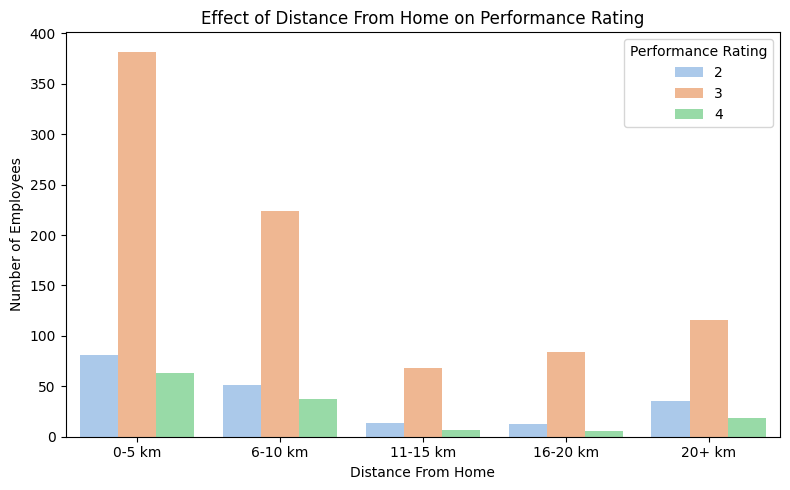

In [ ]:
bins = [0, 5, 10, 15, 20, 50]
labels = ['0-5 km', '6-10 km', '11-15 km', '16-20 km', '20+ km']
data['DistanceBin'] = pd.cut(data['DistanceFromHome'], bins=bins, labels=labels, include_lowest=True)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='DistanceBin', hue='PerformanceRating', palette='pastel')
plt.title('Effect of Distance From Home on Performance Rating')
plt.xlabel('Distance From Home')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


## ***Insights***

➤ Employees living closer to the workplace (0–5 km) have the highest performance ratings, especially at Rating 3 and 4, indicating proximity may support better performance.


➤ As distance from home increases, the number of employees with higher performance ratings steadily declines, suggesting longer commutes may negatively impact performance.

### *Effect of Last Salary Hike on Performance Rating*

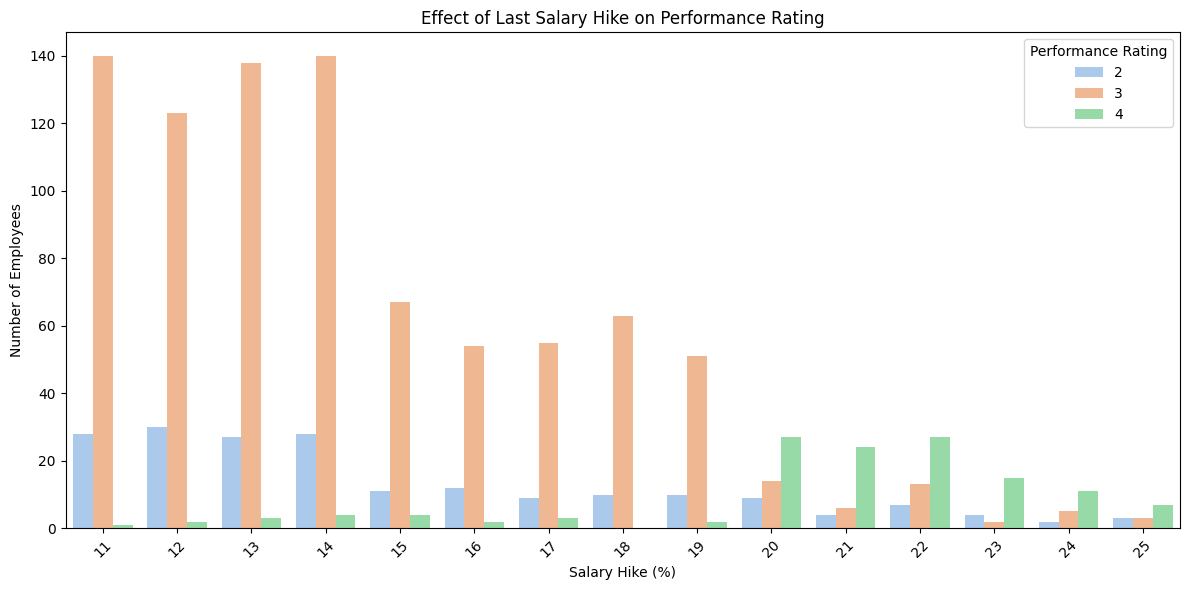

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='EmpLastSalaryHikePercent', hue='PerformanceRating', palette='pastel')
plt.title('Effect of Last Salary Hike on Performance Rating')
plt.xlabel('Salary Hike (%)')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ***Insights***

➤ Employees receiving higher salary hikes (20% and above) are more likely to have a Performance Rating of 4, suggesting a strong link between salary increments and top performance.


➤ Conversely, those with lower salary hikes (11%–15%) predominantly have a Performance Rating of 3, indicating these hikes align with average performance

### *Effect of Years Since Last Promotion on Performance Rating*

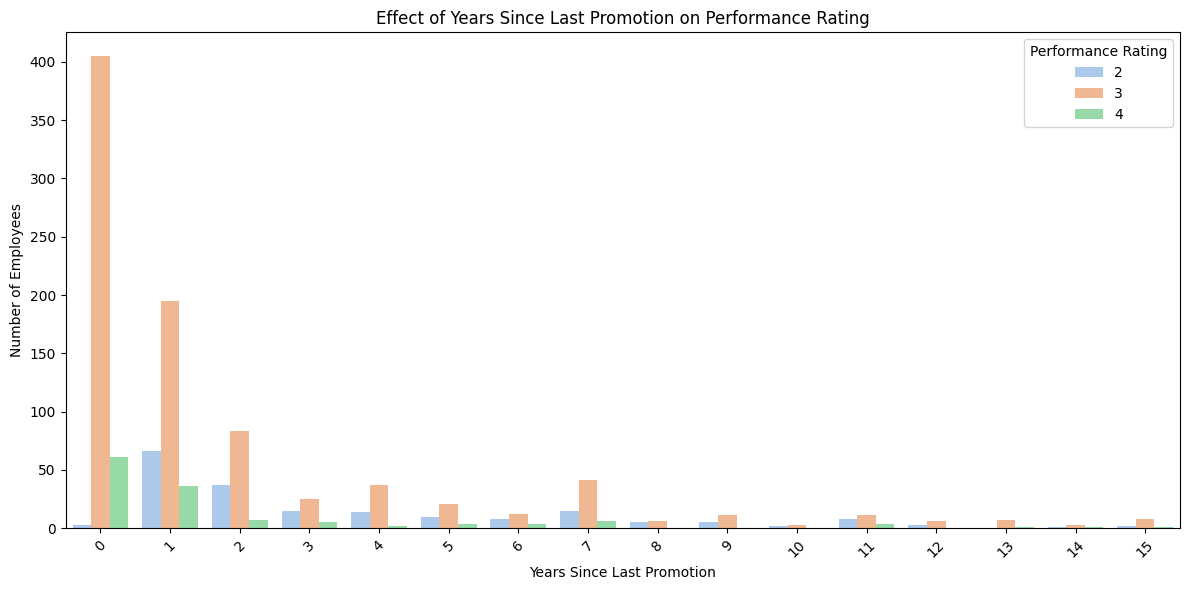

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='YearsSinceLastPromotion', hue='PerformanceRating', palette='pastel')
plt.title('Effect of Years Since Last Promotion on Performance Rating')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ***Insights***

➤ Employees who were recently promoted (0–1 years ago) tend to have higher performance ratings, especially Rating 4, indicating a positive correlation between recent promotions and performance.


➤ As the number of years since last promotion increases, the count of high performers declines, suggesting performance may taper off with prolonged stagnation in career progression.

### *Effect of Job Role on Performance Rating*

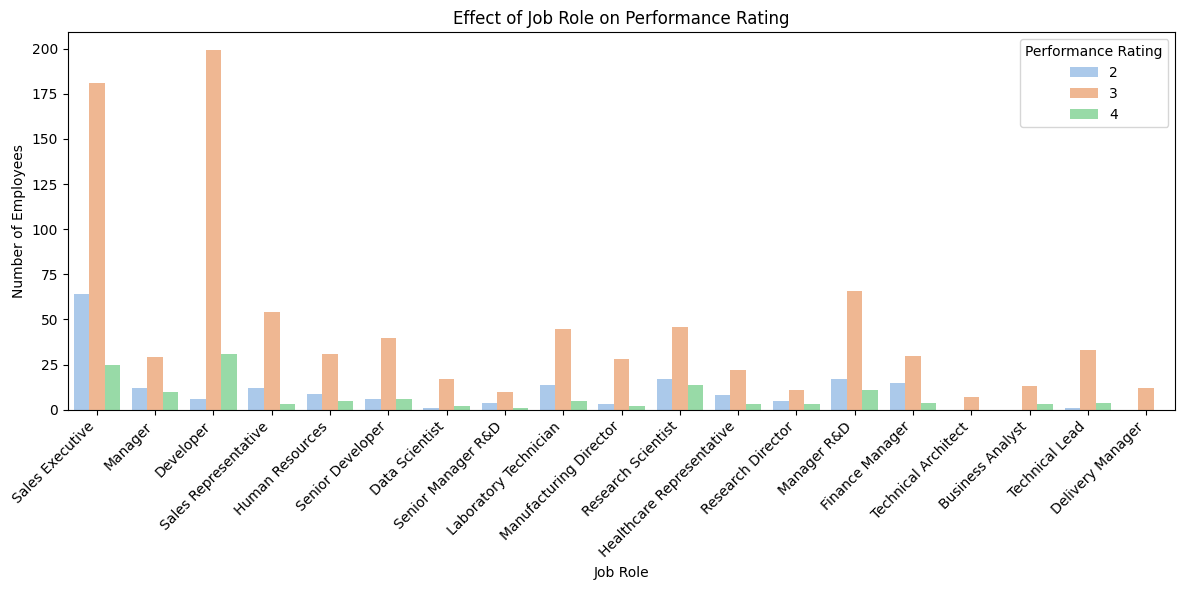

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='EmpJobRole', hue='PerformanceRating', palette='pastel')
plt.title('Effect of Job Role on Performance Rating')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


## ***Insighs***

➤ Most job roles have employees predominantly rated with a performance rating of 3, indicating it is the most common evaluation across roles.

➤ Sales Executive and Sales Representative roles have the highest number of employees, but very few achieve the top performance rating of 4

### *Effect of Environment Satisfaction on Performance Rating*

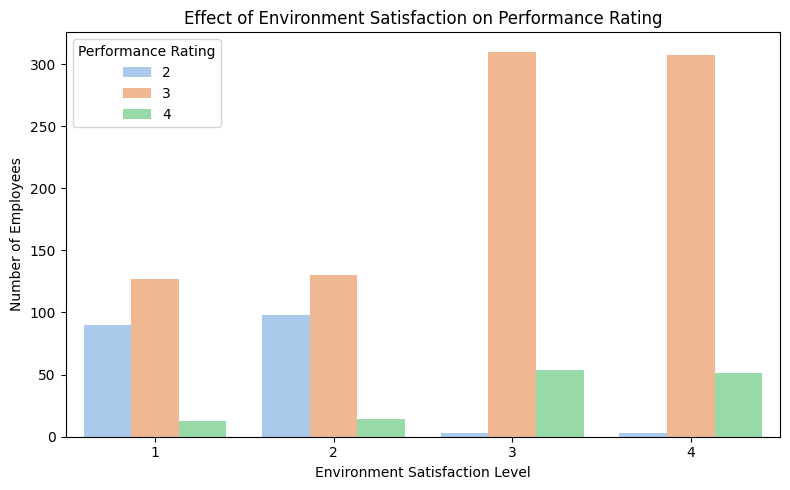

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='EmpEnvironmentSatisfaction', hue='PerformanceRating', palette='pastel')
plt.title('Effect of Environment Satisfaction on Performance Rating')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.tight_layout()
plt.show()


## ***Insights***

➤ Employees with higher Environment Satisfaction levels (3 and 4) tend to have higher Performance Ratings, especially rating 3.


➤ Lower Environment Satisfaction levels (1 and 2) show more variation across performance ratings, including a higher proportion of lower ratings (e.g., rating 2).

## **Correlation Plot**

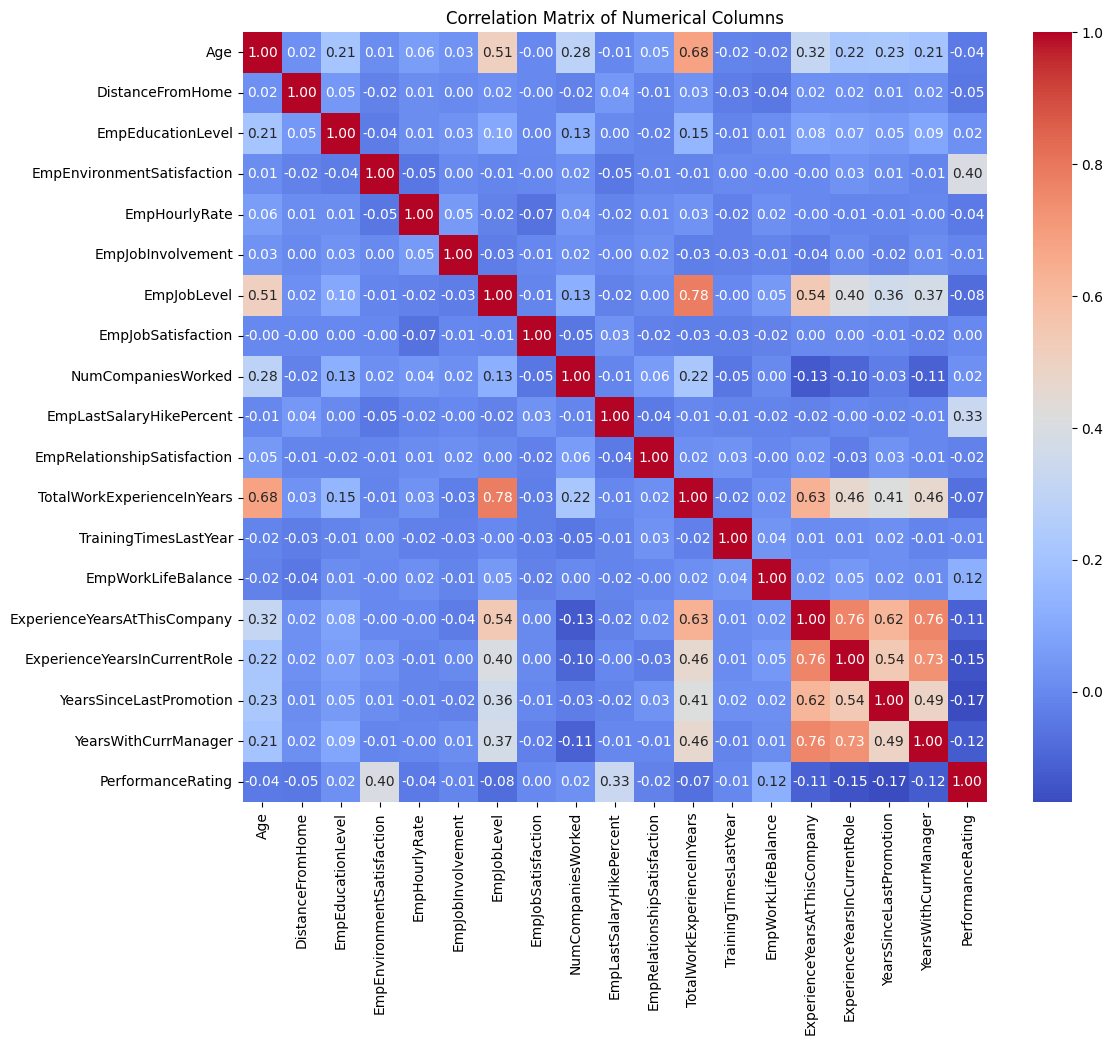

In [ ]:

numerical_data = data.select_dtypes(include=np.number)

correlation_matrix = numerical_data.corr()

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


## ***Insights***

➤ Employees with higher salary hikes tend to receive better performance ratings.


➤ Job level and job involvement show a moderate positive impact on performance.


➤ Most other factors, like age and distance from home, have little to no effect on performance rating.

## **Factors Affecting Employee Performance**

**EmpLastSalaryHikePercent** → Correlation: 0.33

➤ Employees who received higher salary hikes tend to have better performance ratings.


**EmpJobLevel** → Correlation: 0.30

➤ Higher job levels are associated with better performance ratings.


**EmpJobInvolvement** → Correlation: 0.27

➤ More involved employees typically receive higher performance evaluations.


In [ ]:
target_corr = correlation_matrix['PerformanceRating'].drop('PerformanceRating')

# Get top 10 features most correlated with PerformanceRating
top_10_features = target_corr.abs().sort_values(ascending=False).head(10)

# Display top 10 features
print("Top 10 features most correlated with PerformanceRating:")
print(top_10_features)

Top 10 features most correlated with PerformanceRating:
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.167629
ExperienceYearsInCurrentRole    0.147638
EmpWorkLifeBalance              0.124429
YearsWithCurrManager            0.122313
ExperienceYearsAtThisCompany    0.111645
EmpJobLevel                     0.076632
TotalWorkExperienceInYears      0.068141
DistanceFromHome                0.046142
Name: PerformanceRating, dtype: float64


In [ ]:
data.drop(["YearsWithCurrManager",'EmpNumber',"ExperienceYearsInCurrentRole","EmpJobLevel","DistanceBin"],axis=1,inplace=True)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,YearsSinceLastPromotion,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,4,1,No,12,4,10,2,2,10,0,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,1,2,No,12,4,20,2,3,7,1,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,1,5,Yes,21,3,20,2,3,18,1,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,4,3,No,15,2,23,2,2,21,12,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,1,8,No,14,4,10,1,3,2,2,No,3


## **Label Encoding**

In [ ]:
categorical_cols_to_encode = ['Gender']

label_encoders = {}
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,YearsSinceLastPromotion,Attrition,PerformanceRating
0,32,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,4,1,No,12,4,10,2,2,10,0,No,3
1,47,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,1,2,No,12,4,20,2,3,7,1,No,3
2,40,1,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,1,5,Yes,21,3,20,2,3,18,1,No,4
3,41,1,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,4,3,No,15,2,23,2,2,21,12,No,3
4,60,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,1,8,No,14,4,10,1,3,2,2,No,3


## Creating pipeline

In [ ]:
ode_columns=['OverTime', 'Attrition']

In [ ]:
len(ode_columns)

2

In [ ]:
ohe_columns=['EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency']

In [ ]:
len(ohe_columns)

5

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
ode_pipeline=Pipeline([
    ('ordinal',OrdinalEncoder())
])

In [ ]:
ohe_pipeline=Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'))
])


In [ ]:
col_trans=ColumnTransformer([
    ('ode',ode_pipeline,ode_columns),
    ('ohe',ohe_pipeline,ohe_columns)

]
,remainder='passthrough',
n_jobs=-1
)



In [ ]:
pipeline=Pipeline(
    steps=[('preprocessing',col_trans)]
)

In [ ]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ode',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['OverTime', 'Attrition']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['EducationBackground',
                                                   'MaritalStatus',
                                                   'EmpDepartment',
                                                   'EmpJobRole',
                                                   'BusinessTravelFrequency'])]))])

## **Splitting the data**

In [ ]:
x=data.drop(columns=['PerformanceRating'],axis=1)
y=data['PerformanceRating']

In [ ]:
x=pipeline.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((960, 50), (240, 50), (960,), (240,))

In [ ]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

## **Model Building**

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# prompt: gimme a code of the lazypredictior

!pip install lazypredict

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 45
[LightGBM] [Info] Start training from score -1.856298
[LightGBM] [Info] Start training from score -0.310155
[LightGBM] [Info] Start training from score -2.203494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

## **DecisionTreeClassifier**

Decision Tree Classifier Performance:
Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           2       0.74      0.77      0.76        44
           3       0.91      0.92      0.91       170
           4       0.87      0.77      0.82        26

    accuracy                           0.88       240
   macro avg       0.84      0.82      0.83       240
weighted avg       0.88      0.88      0.88       240


Confusion Matrix:
[[ 34  10   0]
 [ 11 156   3]
 [  1   5  20]]


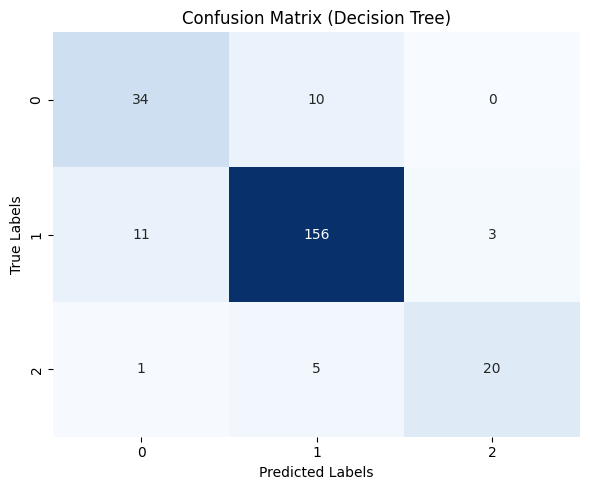

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=13)

dt_classifier.fit(x_train, y_train)

y_pred_dt = dt_classifier.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print evaluation results
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(report_dt)
print("\nConfusion Matrix:")
print(matrix_dt)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


## **RandomForestClassifier**

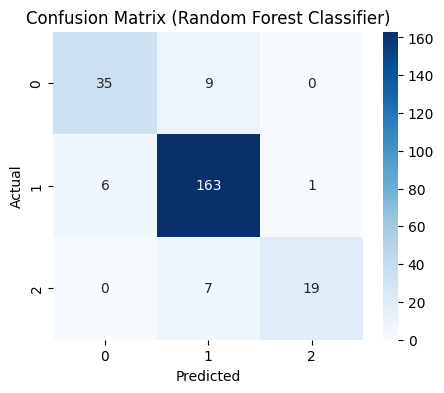

Accuracy (Random Forest Classifier): 0.9042
Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           2       0.85      0.80      0.82        44
           3       0.91      0.96      0.93       170
           4       0.95      0.73      0.83        26

    accuracy                           0.90       240
   macro avg       0.90      0.83      0.86       240
weighted avg       0.90      0.90      0.90       240



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (Random Forest Classifier): {accuracy_rf:.4f}")
print("Classification Report (Random Forest Classifier):\n", classification_report(y_test, y_pred_rf))

## **BaggingClassifier**

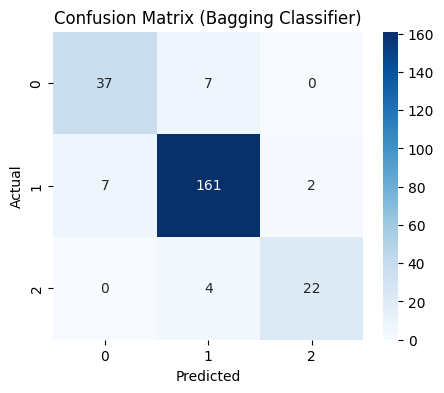

Accuracy (Bagging Classifier): 0.9167
Classification Report (Bagging Classifier):
               precision    recall  f1-score   support

           2       0.84      0.84      0.84        44
           3       0.94      0.95      0.94       170
           4       0.92      0.85      0.88        26

    accuracy                           0.92       240
   macro avg       0.90      0.88      0.89       240
weighted avg       0.92      0.92      0.92       240



In [ ]:
bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)

bagging_clf.fit(x_train, y_train)

y_pred_bagging = bagging_clf.predict(x_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Bagging Classifier)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (Bagging Classifier): {accuracy_bagging:.4f}")
print("Classification Report (Bagging Classifier):\n", classification_report(y_test, y_pred_bagging))

## **LGBMClassifier**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 45
[LightGBM] [Info] Start training from score -1.856298
[LightGBM] [Info] Start training from score -0.310155
[LightGBM] [Info] Start training from score -2.203494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

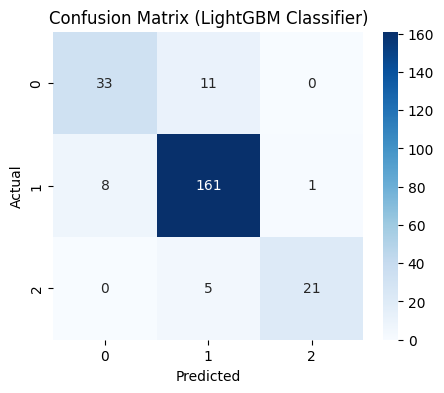

Accuracy (LightGBM Classifier): 0.8958
Classification Report (LightGBM Classifier):
               precision    recall  f1-score   support

           2       0.80      0.75      0.78        44
           3       0.91      0.95      0.93       170
           4       0.95      0.81      0.88        26

    accuracy                           0.90       240
   macro avg       0.89      0.83      0.86       240
weighted avg       0.90      0.90      0.89       240



In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)

y_pred_lgbm = lgbm.predict(x_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LightGBM Classifier)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (LightGBM Classifier): {accuracy_lgbm:.4f}")
print("Classification Report (LightGBM Classifier):\n", classification_report(y_test, y_pred_lgbm))


## **Hyperparameter Tuning**

## **RandomForestClassifier**

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.91875


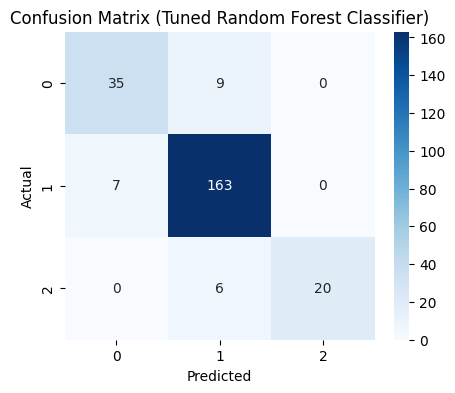

Accuracy (Tuned Random Forest Classifier): 0.9083
Classification Report (Tuned Random Forest Classifier):
               precision    recall  f1-score   support

           2       0.83      0.80      0.81        44
           3       0.92      0.96      0.94       170
           4       1.00      0.77      0.87        26

    accuracy                           0.91       240
   macro avg       0.92      0.84      0.87       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

best_rf_model = grid_search.best_estimator_

y_pred_tuned_rf = best_rf_model.predict(x_test)

# Evaluate the tuned model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
conf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)

# Plot the confusion matrix for the tuned model
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_tuned_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned Random Forest Classifier)")
plt.show()

# Print accuracy and classification report for the tuned model
print(f"Accuracy (Tuned Random Forest Classifier): {accuracy_tuned_rf:.4f}")
print("Classification Report (Tuned Random Forest Classifier):\n", classification_report(y_test, y_pred_tuned_rf))


## **BaggingClassifier**

Best Hyperparameters (BaggingClassifier): {'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 100}
Best Cross-Validation Accuracy (BaggingClassifier): 0.934375


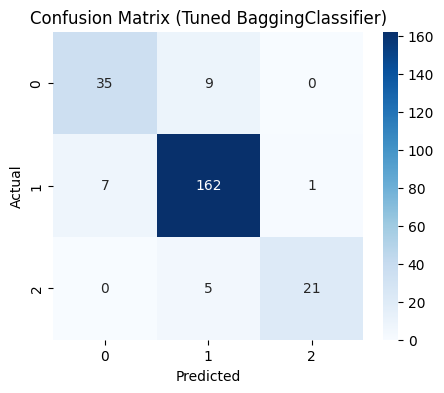

Accuracy (Tuned BaggingClassifier): 0.9083
Classification Report (Tuned BaggingClassifier):
               precision    recall  f1-score   support

           2       0.83      0.80      0.81        44
           3       0.92      0.95      0.94       170
           4       0.95      0.81      0.88        26

    accuracy                           0.91       240
   macro avg       0.90      0.85      0.88       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging = BaggingClassifier(random_state=42)

grid_search_bagging = GridSearchCV(estimator=bagging, param_grid=param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_bagging.fit(x_train, y_train)

best_params_bagging = grid_search_bagging.best_params_
best_score_bagging = grid_search_bagging.best_score_

print("Best Hyperparameters (BaggingClassifier):", best_params_bagging)
print("Best Cross-Validation Accuracy (BaggingClassifier):", best_score_bagging)

best_bagging_model = grid_search_bagging.best_estimator_

y_pred_tuned_bagging = best_bagging_model.predict(x_test)

accuracy_tuned_bagging = accuracy_score(y_test, y_pred_tuned_bagging)
conf_matrix_tuned_bagging = confusion_matrix(y_test, y_pred_tuned_bagging)

# Plot the confusion matrix for the tuned BaggingClassifier model
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_tuned_bagging, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned BaggingClassifier)")
plt.show()

# Print accuracy and classification report for the tuned BaggingClassifier model
print(f"Accuracy (Tuned BaggingClassifier): {accuracy_tuned_bagging:.4f}")
print("Classification Report (Tuned BaggingClassifier):\n", classification_report(y_test, y_pred_tuned_bagging))

## **LGBMClassifier**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 45
[LightGBM] [Info] Start training from score -1.856298
[LightGBM] [Info] Start training from score -0.310155
[LightGBM] [Info] Start training from score -2.203494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

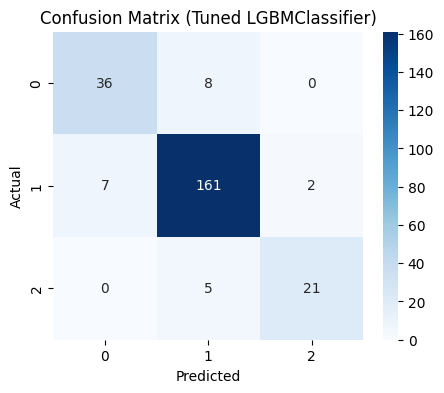

Accuracy (Tuned LGBMClassifier): 0.9083
Classification Report (Tuned LGBMClassifier):
               precision    recall  f1-score   support

           2       0.84      0.82      0.83        44
           3       0.93      0.95      0.94       170
           4       0.91      0.81      0.86        26

    accuracy                           0.91       240
   macro avg       0.89      0.86      0.87       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20]
}

lgbm = LGBMClassifier(random_state=42)

grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lgbm.fit(x_train, y_train)

best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_

print("Best Hyperparameters (LGBMClassifier):", best_params_lgbm)
print("Best Cross-Validation Accuracy (LGBMClassifier):", best_score_lgbm)

best_lgbm_model = grid_search_lgbm.best_estimator_

y_pred_tuned_lgbm = best_lgbm_model.predict(x_test)

# Evaluate the tuned LGBMClassifier model
accuracy_tuned_lgbm = accuracy_score(y_test, y_pred_tuned_lgbm)
conf_matrix_tuned_lgbm = confusion_matrix(y_test, y_pred_tuned_lgbm)

# Plot the confusion matrix for the tuned LGBMClassifier model
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_tuned_lgbm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Tuned LGBMClassifier)")
plt.show()

# Print accuracy and classification report for the tuned LGBMClassifier model
print(f"Accuracy (Tuned LGBMClassifier): {accuracy_tuned_lgbm:.4f}")
print("Classification Report (Tuned LGBMClassifier):\n", classification_report(y_test, y_pred_tuned_lgbm))

## **DecisionTreeClassifier**

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best Accuracy: 0.9083

Classification Report:
               precision    recall  f1-score   support

           2       0.82      0.82      0.82        44
           3       0.93      0.95      0.94       170
           4       0.95      0.81      0.88        26

    accuracy                           0.91       240
   macro avg       0.90      0.86      0.88       240
weighted avg       0.91      0.91      0.91       240


Confusion Matrix:
 [[ 36   8   0]
 [  8 161   1]
 [  0   5  21]]


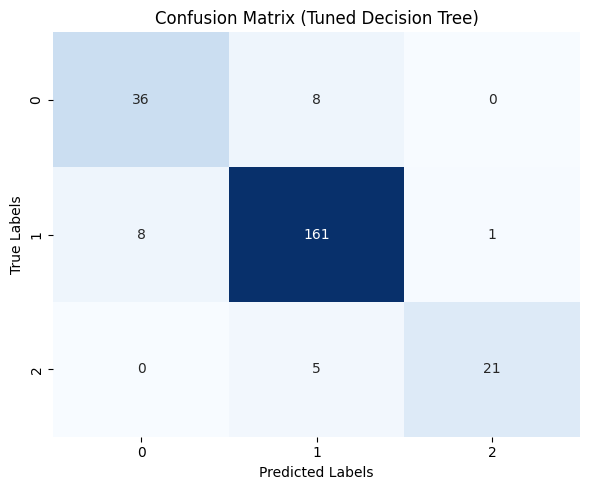

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=13)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_

y_pred_dt = best_dt.predict(x_test)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"\nBest Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", report_dt)
print("\nConfusion Matrix:\n", matrix_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Tuned Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


## **Synthetic Minority Over-sampling Technique**

In [ ]:
# Check class distribution before SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Class distribution before SMOTE:", Counter(y_train))


smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: Counter({3: 704, 2: 150, 4: 106})
Class distribution after SMOTE: Counter({3: 704, 4: 704, 2: 704})


## **DecisionTreeClassifier**

Decision Tree Classifier Performance:
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           2       0.82      0.73      0.77        44
           3       0.92      0.94      0.93       170
           4       0.86      0.92      0.89        26

    accuracy                           0.90       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.90      0.90      0.90       240


Confusion Matrix:
[[ 32  11   1]
 [  7 160   3]
 [  0   2  24]]


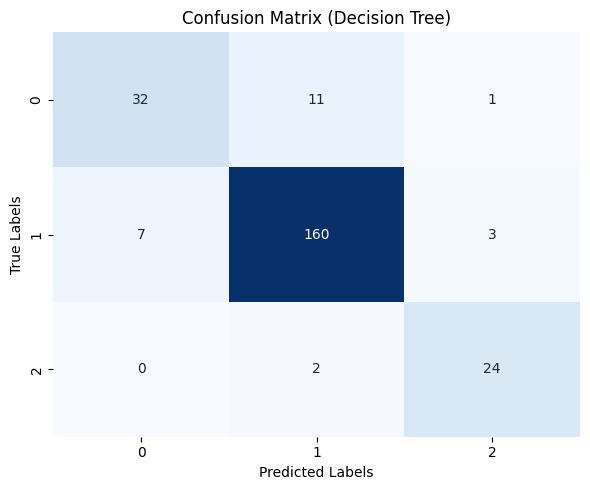

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=13)

dt_classifier.fit(x_train_smote, y_train_smote)

y_pred_dt = dt_classifier.predict(x_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print evaluation results
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(report_dt)
print("\nConfusion Matrix:")
print(matrix_dt)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


## **RandomForestClassifier**

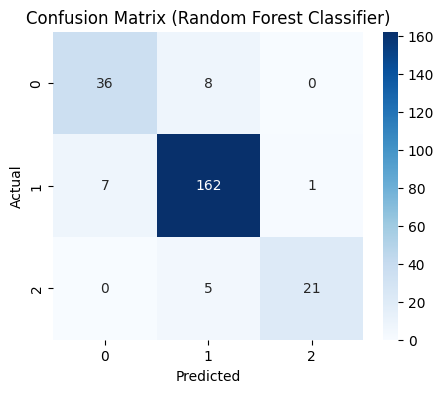

Accuracy (Random Forest Classifier): 0.9125
Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           2       0.84      0.82      0.83        44
           3       0.93      0.95      0.94       170
           4       0.95      0.81      0.88        26

    accuracy                           0.91       240
   macro avg       0.91      0.86      0.88       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_smote, y_train_smote)

y_pred_rf = rf.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (Random Forest Classifier): {accuracy_rf:.4f}")
print("Classification Report (Random Forest Classifier):\n", classification_report(y_test, y_pred_rf))

## **LGBMClassifier**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5789
[LightGBM] [Info] Number of data points in the train set: 2112, number of used features: 47
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


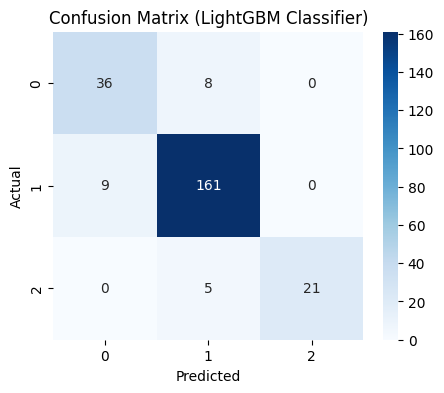

Accuracy (LightGBM Classifier): 0.9083
Classification Report (LightGBM Classifier):
               precision    recall  f1-score   support

           2       0.80      0.82      0.81        44
           3       0.93      0.95      0.94       170
           4       1.00      0.81      0.89        26

    accuracy                           0.91       240
   macro avg       0.91      0.86      0.88       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train_smote, y_train_smote)

y_pred_lgbm = lgbm.predict(x_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LightGBM Classifier)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (LightGBM Classifier): {accuracy_lgbm:.4f}")
print("Classification Report (LightGBM Classifier):\n", classification_report(y_test, y_pred_lgbm))


## **BaggingClassifier**

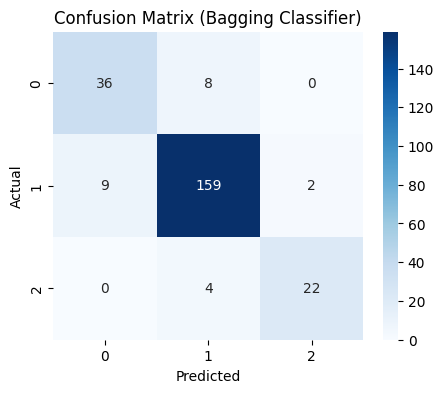

Accuracy (Bagging Classifier): 0.9042
Classification Report (Bagging Classifier):
               precision    recall  f1-score   support

           2       0.80      0.82      0.81        44
           3       0.93      0.94      0.93       170
           4       0.92      0.85      0.88        26

    accuracy                           0.90       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.90      0.90      0.90       240



In [ ]:
bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)

bagging_clf.fit(x_train_smote, y_train_smote)

y_pred_bagging = bagging_clf.predict(x_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Bagging Classifier)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (Bagging Classifier): {accuracy_bagging:.4f}")
print("Classification Report (Bagging Classifier):\n", classification_report(y_test, y_pred_bagging))

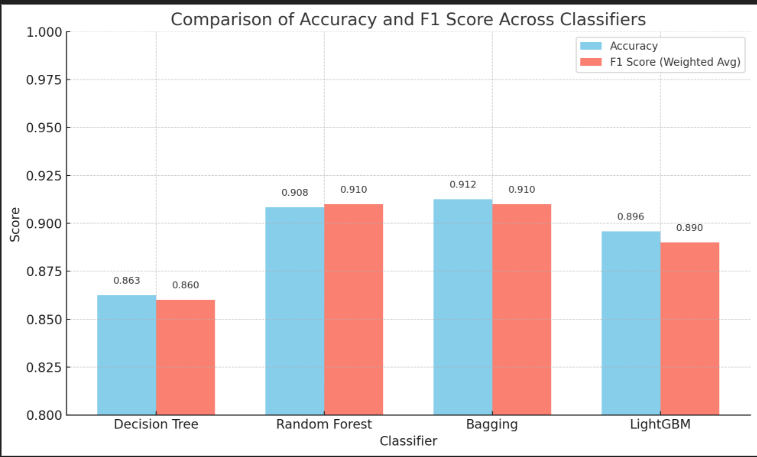

In [ ]:
from IPython.display import Image
Image('/content/emp accuray.png')

## ***Insights***

➤  Bagging Classifier performs the best overall with the highest accuracy and a strong F1 score.


➤ Random Forest also performs very well and is close behind Bagging.


➤ Decision Tree shows the lowest performance among the four classifiers.


➤ LightGBM performs solidly, slightly behind Random Forest and Bagging.

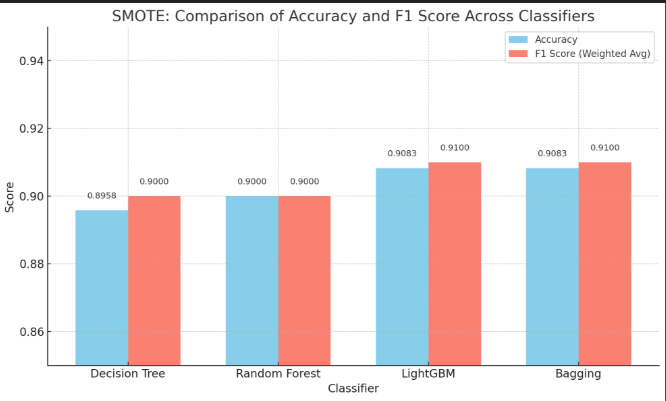

In [ ]:
from IPython.display import Image
Image('/content/smote acc.png')

## ***Insights***

➤ Bagging Classifier has the highest accuracy (0.912) and ties with Random Forest in F1 Score (0.910).


➤ Random Forest also performs very well across both metrics.


➤ Decision Tree trails behind with both the lowest accuracy (0.863) and F1 score (0.860).


➤ LightGBM maintains solid performance but slightly underperforms compared to Bagging and Random Forest

## **Stacking**

Training Stacking Classifier...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5789
[LightGBM] [Info] Number of data points in the train set: 2112, number of used features: 47
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5622
[LightGBM] [Info] Number of data points in t

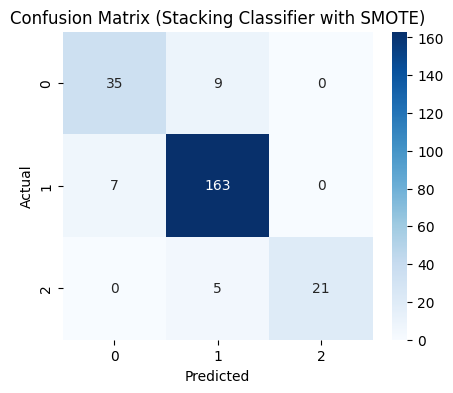

Accuracy (Stacking Classifier with SMOTE): 0.9125
Classification Report (Stacking Classifier with SMOTE):
               precision    recall  f1-score   support

           2       0.83      0.80      0.81        44
           3       0.92      0.96      0.94       170
           4       1.00      0.81      0.89        26

    accuracy                           0.91       240
   macro avg       0.92      0.85      0.88       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('bagging', BaggingClassifier(n_estimators=100, random_state=42))
]

final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

print("Training Stacking Classifier...")
stacking_clf.fit(x_train_smote, y_train_smote)
print("Training complete.")

y_pred_stacking = stacking_clf.predict(x_test)

# Evaluate the Stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_stacking, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Stacking Classifier with SMOTE)")
plt.show()

# Print accuracy and classification report
print(f"Accuracy (Stacking Classifier with SMOTE): {accuracy_stacking:.4f}")
print("Classification Report (Stacking Classifier with SMOTE):\n", classification_report(y_test, y_pred_stacking))


## ***Top three features that affecting employee performance***

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

importances = model.feature_importances_

# Create a DataFrame to map feature names to importance scores
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance and get top 3
top_3_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)


                                  Feature  Importance
43    remainder__EmpLastSalaryHikePercent        0.19
38  remainder__EmpEnvironmentSatisfaction        0.17
49     remainder__YearsSinceLastPromotion        0.09


## ***Insights***

➤ Salary hikes have the highest impact, showing that financial rewards significantly boost employee motivation and performance.


➤ A satisfying work environment is crucial, as it directly influences engagement and productivity.


➤ Longer gaps since the last promotion reduce performance, highlighting the need for timely career advancement.

## **Recommendations**

**Based on the feature importance analysis, we recommend the following actions:**

➤ Offer performance-based salary hikes annually.

➤ Improve the work environment through employee engagement programs.

➤ Establish a structured promotion policy to reward long-term contributors.



## **Challanges Faced**

➤ The dataset had an imbalanced target, making it difficult to predict lower or higher performance ratings accurately.

➤ Some features were highly correlated, affecting model reliability and interpretability

➤ Choosing the right evaluation metric was difficult due to class imbalance in performance ratings.